Mounting Drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import sklearn

In [41]:
print(sklearn.__version__)

1.3.1


### Importing Libraries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Json file

In [43]:
import json
f = open('/content/drive/MyDrive/HeroVired/complaints.json')
rawdata = json.load(f)

In [44]:
raw_data = rawdata['data']

### Creating DataFrame of the file data

In [45]:
data = pd.DataFrame(raw_data)
data.head()

,text,complaint_id
0,I recently opened a Citibank CitiGold Checking...,bc_5
1,I went into Capital One bank to open a checkin...,bc_3
2,I try using my chase card at a bakery departme...,bc_2
3,Approximately a half hour ago I visited a US B...,bc_2
4,I have made a transaction using Chase quickpay...,bc_6


In [46]:
data['text'][0]

'I recently opened a Citibank CitiGold Checking Account that was advertised to have a signup bonus of   AAdvantage points upon the completion of two consecutive bill payments and {$1000.00} in debit card purchases. After signing up with the intent to complete these requirements a Citibank representative confirmed that the offer applied to my new account and that I should complete the offer requirements. This confirmation was communicated via their online secure message feature, and I have attached a copy for reference. Once I completed the requirements as directed I inquired about the expected delivery date of the earned bonus via secure message and I was told that my account was not targeted and that I would not receive the bonus as promised. This conflicts with what I was previously told and I have already spent a considerable amount of time to meet the requirements as directed. '

### Checking for the data shape

In [47]:
data.shape

(400, 2)

### Checking for Missing Values

In [48]:
data.isnull().sum()

text            0
complaint_id    0
dtype: int64

### Checking for the percentage of stopwords in each text.

In [49]:
pip install nltk

In [50]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [52]:
len(stop_words)

179

In [53]:
# Defining a function to calculate the percantage of stopwords in each texts

def swp(text):
    text = text.lower()
    text_without_stopwords = [w for w in text if not w in stop_words]
    res = 100 - (len(text_without_stopwords)/ len(text))*100
    return np.round(res)

### Creating another column containg % of stopwords

In [54]:
data['stopwords%'] = data['text'].apply(swp)

In [55]:
data.head()

,text,complaint_id,stopwords%
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0
1,I went into Capital One bank to open a checkin...,bc_3,36.0
2,I try using my chase card at a bakery departme...,bc_2,39.0
3,Approximately a half hour ago I visited a US B...,bc_2,39.0
4,I have made a transaction using Chase quickpay...,bc_6,42.0


In [56]:
data['stopwords%'].min(),data['stopwords%'].max(),data['stopwords%'].mean()

(29.0, 50.0, 37.815)

### Creating sub-categories ['low','Medium','High'] for the percentage of stopwords

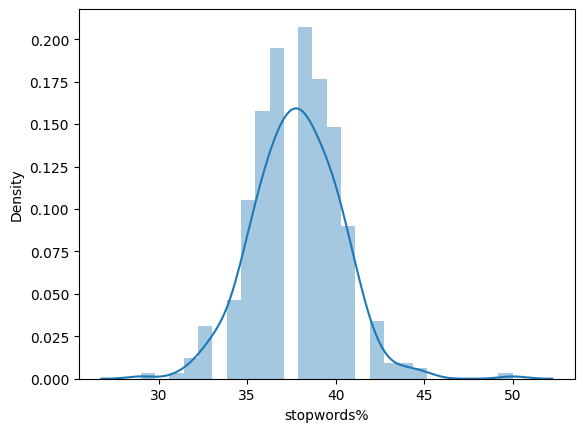

In [57]:
sns.distplot(data['stopwords%']);

# If percentage of stopwords in text is:
#       stp% <= 35% ------ labeled as Low
# 36% < stp% <= 40% ------ labeled as Medium
#        stp% > 40% ------ labeled as High

In [58]:
bins = [0,35,40,100]
labels = ['Low','Medium','High']

data['stp%'] = pd.cut(data['stopwords%'],bins = bins,labels = labels,include_lowest= True)

In [59]:
data.head()

,text,complaint_id,stopwords%,stp%
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High


In [60]:
data['stp%'].value_counts(normalize = True)*100

Medium    71.50
Low       16.25
High      12.25
Name: stp%, dtype: float64

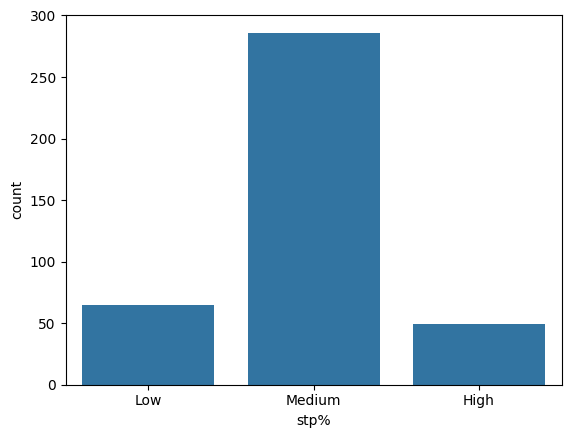

In [61]:
sns.countplot(x = 'stp%',data = data);

#### Most of the texts( around 72% of text data) contains medium level of stop words. range lies between [35% - 40%]
#### Some of the texts( around 16% of text data) contains Low level of stop words. range lies between [less than 35%]
#### Few of the texts( around 12% of text data) contains High level of stop words. range lies between [More than 40%]

In [62]:
data

,text,complaint_id,stopwords%,stp%
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High
...,...,...,...,...
395,I am struggling to get the debt relief I am en...,lc_1,33.0,Low
396,I turn in the car in 2010 as a voluntary repos...,lc_0,35.0,Low
397,We set up payment for interest payment only fo...,lc_1,43.0,High
398,This regards a car loan financed by First Hawa...,lc_0,36.0,Medium


In [63]:
### On the basis of complaint_ids, entire complaints can be categorized into 4 different Departments

In [64]:
# defining function to segregate complaints according to the departments they belong.

def dept(complaint_id):
    if complaint_id == 'bc_0' or complaint_id == 'bc_1' or complaint_id == 'bc_2' or complaint_id == 'bc_3' or complaint_id == 'bc_4' or complaint_id == 'bc_5' or complaint_id == 'bc_6':
        return 'Department_BC'
    elif complaint_id == 'mc_0' or complaint_id == 'mc_1' or complaint_id == 'mc_2' or complaint_id == 'mc_3' or complaint_id == 'mc_4':
        return 'Department_MC'
    elif complaint_id == 'cc_0' or complaint_id == 'cc_1' or complaint_id == 'cc_2' or complaint_id == 'cc_3' or complaint_id == 'cc_4' or complaint_id == 'cc_5' or complaint_id == 'cc_6' or complaint_id == 'cc_7' or complaint_id == 'cc_8' or complaint_id == 'cc_9' or complaint_id == 'cc_10' or complaint_id == 'cc_11' or complaint_id == 'cc_12' or complaint_id == 'cc_13' or complaint_id == 'cc_14' or complaint_id == 'cc_15':
        return 'Department_CC'
    elif complaint_id == 'lc_0' or complaint_id == 'lc_1' or complaint_id == 'lc_2':
        return 'Department_LC'

In [65]:
data['Department'] = data['complaint_id'].apply(dept)
data.head()

,text,complaint_id,stopwords%,stp%,Department
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium,Department_BC
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium,Department_BC
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium,Department_BC
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium,Department_BC
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High,Department_BC


In [66]:
data['Department'].value_counts()

Department_BC    100
Department_MC    100
Department_CC    100
Department_LC    100
Name: Department, dtype: int64

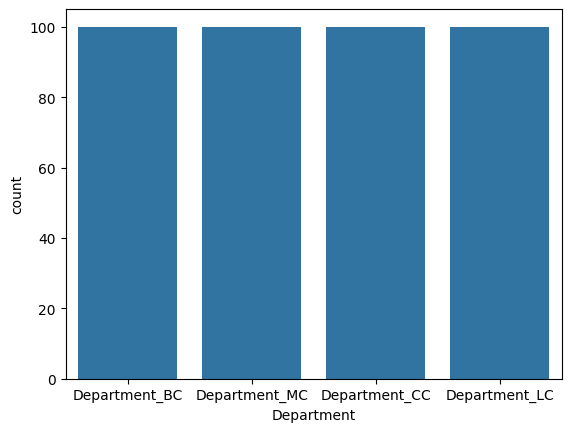

In [67]:
sns.countplot(x = 'Department', data = data);

#### Equal amount of complaints belongs to each departments, i.e 25%

### Checking if texts contain any tagging

In [68]:
contain_tag = data['text'].str.contains(r'<.*?>')
contain_tag

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: text, Length: 400, dtype: bool

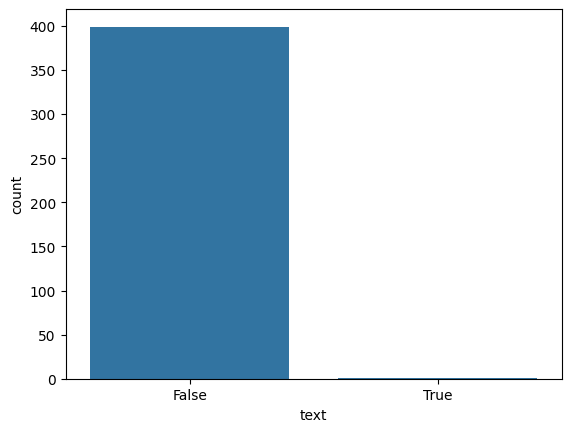

In [69]:
sns.countplot(x = contain_tag);

##### texts data does not have any Tagging

## Performing Data Cleaning
#### (1) I'll remove tags, numbers, special charecters from the texts
#### (2) I'll remove stopwords from the text
#### (3) I'll conveert text into lower case
#### (4) I'll apply Lammetization to reduce words to its lemma.

In [70]:
# Importing required Libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from bs4 import BeautifulSoup
import re


In [71]:
# Defining function to clean texts

def Clean(raw_data):
    # 1. This will  Delete HTML tags and other special charecter from the text
    data = BeautifulSoup(raw_data, 'html.parser').get_text()
    # 2. This will remove numbers and fills empty space with blank space
    alphabets = re.sub('[^a-zA-Z]', ' ', data)
    # 3.  This will bring all alphabets in the text into lower case
    words = alphabets.lower().split()
    # 5. Stopwords, This will remove all the stopwords from the text
    meaningful_words = [w for w in words if not w in stop_words]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [72]:
data['Clean_Text'] = data['text'].apply(Clean)

In [73]:
data.head()

,text,complaint_id,stopwords%,stp%,Department,Clean_Text
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium,Department_BC,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium,Department_BC,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium,Department_BC,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium,Department_BC,approximately half hour ago visited u bank atm...
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High,Department_BC,made transaction using chase quickpay sent mon...


In [74]:
data['text'][0]

'I recently opened a Citibank CitiGold Checking Account that was advertised to have a signup bonus of   AAdvantage points upon the completion of two consecutive bill payments and {$1000.00} in debit card purchases. After signing up with the intent to complete these requirements a Citibank representative confirmed that the offer applied to my new account and that I should complete the offer requirements. This confirmation was communicated via their online secure message feature, and I have attached a copy for reference. Once I completed the requirements as directed I inquired about the expected delivery date of the earned bonus via secure message and I was told that my account was not targeted and that I would not receive the bonus as promised. This conflicts with what I was previously told and I have already spent a considerable amount of time to meet the requirements as directed. '

In [75]:
data['Clean_Text'][0]

'recently opened citibank citigold checking account advertised signup bonus aadvantage point upon completion two consecutive bill payment debit card purchase signing intent complete requirement citibank representative confirmed offer applied new account complete offer requirement confirmation communicated via online secure message feature attached copy reference completed requirement directed inquired expected delivery date earned bonus via secure message told account targeted would receive bonus promised conflict previously told already spent considerable amount time meet requirement directed'

## Plotting Word Clouds for each departments to visualize most frequent words in complaints related to its departmets

In [76]:
# Creating sub-categories for complaints belonging to their departments

BC=data[(data['Department']=='Department_BC')]
MC=data[(data['Department']=='Department_MC')]
CC=data[(data['Department']=='Department_CC')]
LC=data[(data['Department']=='Department_LC')]

In [77]:
BC.head()

,text,complaint_id,stopwords%,stp%,Department,Clean_Text
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium,Department_BC,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium,Department_BC,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium,Department_BC,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium,Department_BC,approximately half hour ago visited u bank atm...
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High,Department_BC,made transaction using chase quickpay sent mon...


#### Creating Function for plotting Unigram and Bigram wordcloud

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

def Unigram_WC(X):
  word_cld = WordCloud(width=1800, height=1200).generate(' '.join(X))
  plt.figure(figsize = (50,5))
  plt.imshow(word_cld)
  plt.show()

def Bigram_WC(X):
  bigrams_list = list(nltk.bigrams(X))
  bigrams = [' '.join(tup) for tup in bigrams_list]
  vectorizer = CountVectorizer(ngram_range=(2, 2))
  bag_of_words = vectorizer.fit_transform(bigrams)
  sum_words = bag_of_words.sum(axis=0)
  bigrm_freq = [(wrd, sum_words[0, i]) for wrd, i in vectorizer.vocabulary_.items()]
  bigrm_freq = sorted(bigrm_freq, key=lambda x: x[1], reverse=True)
  bigram_dict = dict(bigrm_freq)
  wrd_cld_bigram = WordCloud(width=1800, height=1200)
  wrd_cld_bigram.generate_from_frequencies(bigram_dict)
  plt.figure(figsize = (50,5))
  plt.imshow(wrd_cld_bigram)
  plt.show()


**Unigram WordCloud for Department_BC**

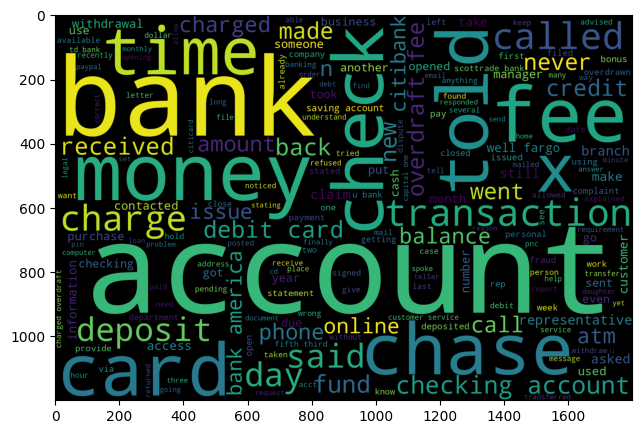

In [79]:
Unigram_WC(BC.Clean_Text)

**Bigram WordCloud for Department_BC**

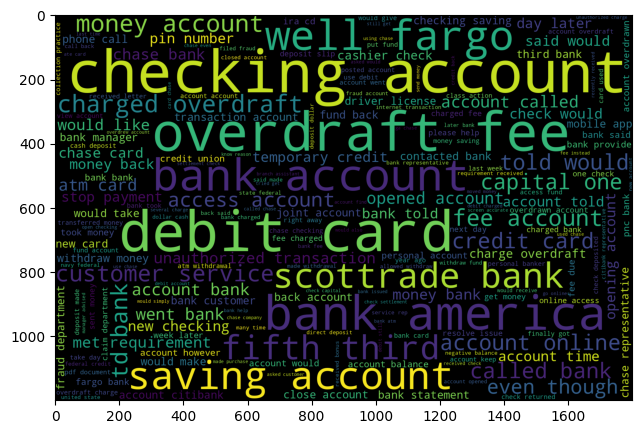

In [80]:
Bigram_WC(BC.Clean_Text)

In [81]:
# from wordcloud import WordCloud
# plt.figure(figsize = (30,5))
# wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(BC.Clean_Text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.title('Word cloud for Department_BC',fontsize=20)
# plt.show()

**Unigram WordCloud for Department_MC**

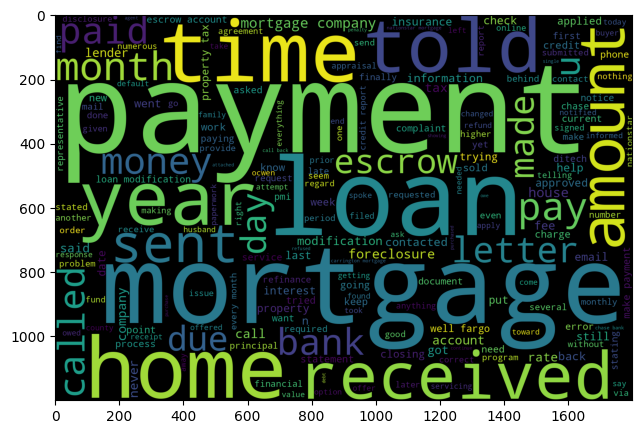

In [82]:
Unigram_WC(MC.Clean_Text)

**Bigram WordCloud for Department_MC**

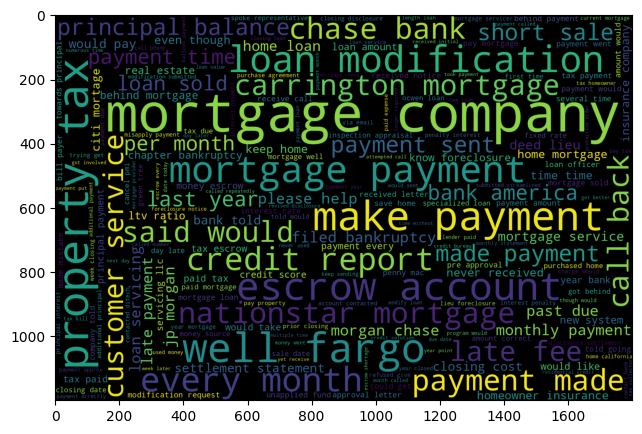

In [83]:
Bigram_WC(MC.Clean_Text)

In [84]:
# plt.figure(figsize = (30,5))
# wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(MC.Clean_Text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.title('Word cloud for Department_MC',fontsize=20)
# plt.show()

**Unigram WordCloud for Department_CC**

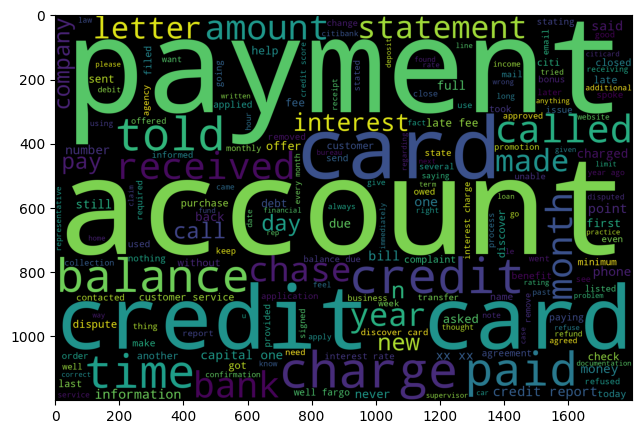

In [85]:
Unigram_WC(CC.Clean_Text)

**Bigram WordCloud for Department_CC**

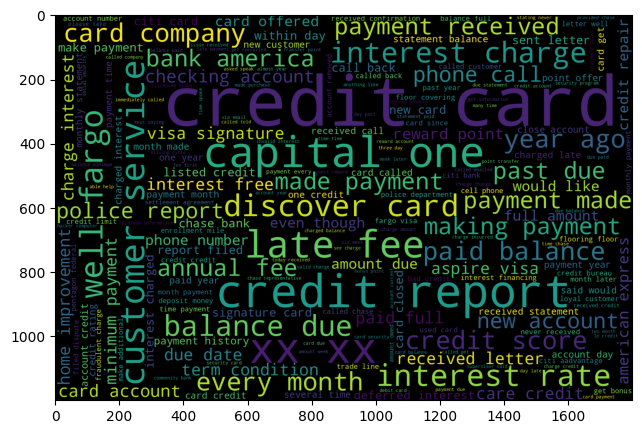

In [86]:
Bigram_WC(CC.Clean_Text)

In [87]:
# plt.figure(figsize = (30,5))
# wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(CC.Clean_Text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.title('Word cloud for Department_CC',fontsize=20)
# plt.show()

**Unigram WordCloud for Department_LC**

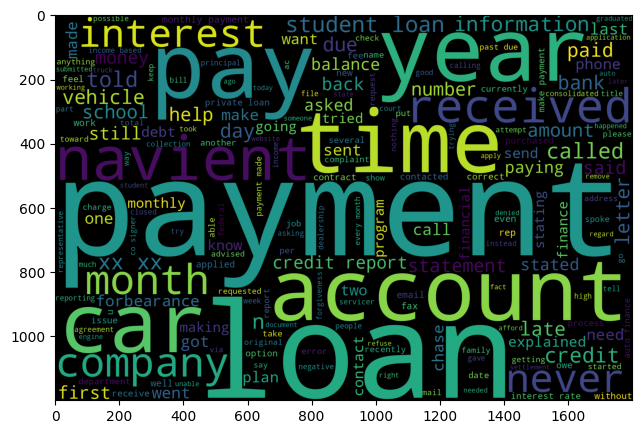

In [88]:
Unigram_WC(LC.Clean_Text)

**Bigram WordCloud for Department_LC**

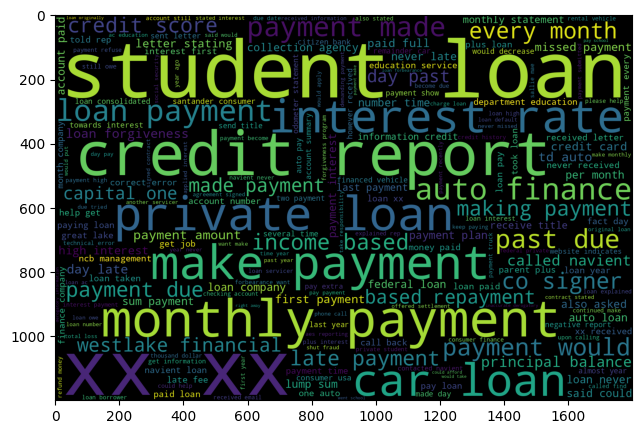

In [89]:
Bigram_WC(LC.Clean_Text)

In [90]:
# plt.figure(figsize = (30,5))
# wc = WordCloud(max_words = 500 , width = 1600 , height = 800, collocations= True).generate(" ".join(LC.Clean_Text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.title('Word cloud for Department_LC',fontsize=20)
# plt.show()

**Unigram WordCloud for Entire Corpous**

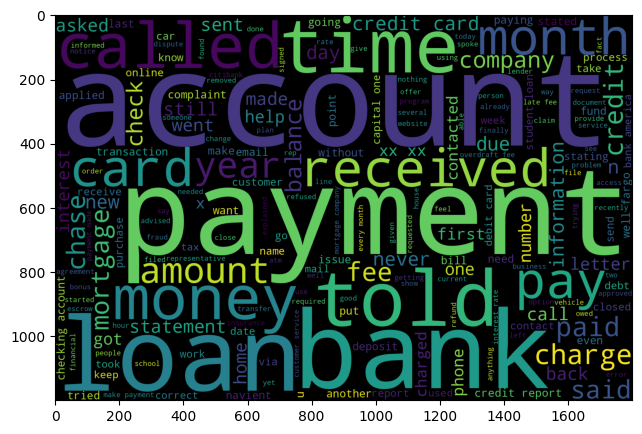

In [91]:
Unigram_WC(data['Clean_Text'])

**Bigram WordCloud for Entire Corpous**

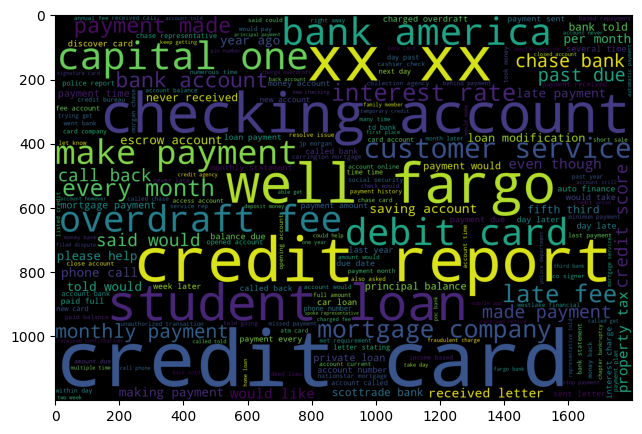

In [92]:
Bigram_WC(data['Clean_Text'])

## Report for ------ Data Understanding(Task 1):
#### Find out how many labeled customer complaints are in the data
#### Ans -: There are 400 labeled Customer Complaints in this Data.
#### Find out the relative frequency of tags in the dataset
#### Ans -: text data does not have any HTML Tagging
#### Check if there are any encoding issues (try to read the data using open() and see if you need to use any special text encoding options, other than utf-8)
#### Ans -: No any encoding issues with this dataset
#### Create a report that identifies how much of each complaint is composed of commonly used English stopwords.
#### Ans -:
#### Most of the texts( around 72% of text data) contains medium level of stop words. range lies between [35% - 40%]
#### Some of the texts( around 16% of text data) contains Low level of stop words. range lies between [less than 35%]
#### Few of the texts( around 12% of text data) contains High level of stop words. range lies between [More than 40%]
### It is also observed that data is balanced, as equal amount of complaint texts belongs to each Departments
#### -- Department_BC = 25%
#### -- Department_MC = 25%
#### -- Department_CC = 25%
#### -- Department_LC = 25%
### It is also observed fro the word cloud, the most frequent occuring words in complaints belonging dept are:
#### -- Department_BC ----- [ Account, Bank, Money, Check, Balance, Deposit]
#### -- Department_MC ----- [ Mortgage, Payment, Time, Home, Year, Loan ]
#### -- Department_CC ----- [Account, Payment, Credit, Card]
#### -- Department_LC ----- [Loan, Payment, Received, Car, Interest, Account]


**Creating tokens for text data**


The prominent difference between a **count matrix** and a **TF-IDF** (Term Frequency-Inverse Document Frequency) matrix lies in their representations of text data:

**Count Matrix:** Represents the frequency of each word in a document or corpus. Each cell in the matrix contains the count of occurrences of a word in a particular document. This matrix does not consider the significance of words in the corpus.

**TF-IDF Matrix:** Represents the importance of each word in a document relative to the entire corpus. It considers both the frequency of a term in a document (TF) and the rarity of the term across all documents (IDF). Words that are common in a specific document but rare in the entire corpus receive higher TF-IDF scores, indicating their significance.

In summary, while the count matrix simply counts the occurrences of words, the TF-IDF matrix assigns weights to words based on their importance in the document and the corpus as a whole

**Creating Count Matrix of Text Data**

In [93]:
data['Clean_Text']

0      recently opened citibank citigold checking acc...
1      went capital one bank open checking account si...
2      try using chase card bakery department x ga ch...
3      approximately half hour ago visited u bank atm...
4      made transaction using chase quickpay sent mon...
                             ...                        
395    struggling get debt relief entitled private lo...
396    turn car voluntary repossession licensed auto ...
397    set payment interest payment one loan paid eve...
398    regard car loan financed first hawaiian bank g...
399    checked loan one main financial never got inqu...
Name: Clean_Text, Length: 400, dtype: object

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer()
Count_Matrix = Vectorizer.fit_transform(data['Clean_Text'])
Count_Matrix = Count_Matrix.toarray()
Count_Matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Creating TF-IDF Matrix**

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_Vectorizer = TfidfVectorizer()
TFIDF_Matrix = TF_Vectorizer.fit_transform(data['Clean_Text'])
TFIDF_Matrix = TFIDF_Matrix.toarray()
TFIDF_Matrix

array([[0.12404776, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09831684, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Creating TF-IDF Matrix using Bigram Tokenization**



In [96]:
TFIDF_Bigram = TfidfVectorizer(ngram_range= (2,2))
TFIDF_Bigram_Matrix = TFIDF_Bigram.fit_transform(data['Clean_Text'])
Bigram_Matrix_feature_Names = TFIDF_Bigram.get_feature_names_out()
TFIDF_Bigram_Matrix = TFIDF_Bigram_Matrix.toarray()
TFIDF_Bigram_Matrix

array([[0.        , 0.        , 0.11659812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
print('Feature_Names for Bigram:')
Bigram_Matrix_feature_Names

Feature_Names for Bigram:


array(['aadvantage cardmember', 'aadvantage platinum', 'aadvantage point',
       ..., 'zero interest', 'zone call', 'zone provide'], dtype=object)

**Creating TF-IDF Matrix using Trigram Tokenization**

In [98]:
TFIDF_Trigram = TfidfVectorizer(ngram_range=(3,3))
TFIDF_Trigram_Matrix = TFIDF_Trigram.fit_transform(data['Clean_Text'])
TFIDF_Trigram_Matrix = TFIDF_Trigram_Matrix.toarray()
TFIDF_Trigram_feature_names = TFIDF_Trigram.get_feature_names_out()
TFIDF_Trigram_Matrix

array([[0.        , 0.        , 0.11795321, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [99]:
print('Feature_Names for Trigram:')
TFIDF_Trigram_feature_names

Feature_Names for Trigram:


array(['aadvantage cardmember eligible', 'aadvantage platinum select',
       'aadvantage point upon', ..., 'zero interest transaction',
       'zone call work', 'zone provide proof'], dtype=object)

In [100]:
TFIDF_Trigram_Tokens = TFIDF_Trigram_feature_names.tolist()
TFIDF_Trigram_Tokens[0:5]

['aadvantage cardmember eligible',
 'aadvantage platinum select',
 'aadvantage point upon',
 'ability make payment',
 'ability sell home']

**Vector representation of the texts**

In [101]:
from gensim.models import Word2Vec

# Here i am using TFIDF_Trigram_Tokens
tokenized_text = TFIDF_Trigram_Tokens
tokenized_text = pd.Series(tokenized_text)
# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of each word
def get_word_vectors(word_list):
    vectors = []
    for word in word_list:
        if word in model.wv:
            vectors.append(model.wv[word])
        else:
            # Handle out-of-vocabulary words
            vectors.append(0)
    return vectors

# Apply Word2Vec to the 'text' column
word_vectors = tokenized_text.apply(get_word_vectors)
word_vectors


0        [[0.24230622, -0.26913142, -0.17802815, 0.1328...
1        [[0.24230622, -0.26913142, -0.17802815, 0.1328...
2        [[0.24230622, -0.26913142, -0.17802815, 0.1328...
3        [[0.24230622, -0.26913142, -0.17802815, 0.1328...
4        [[0.24230622, -0.26913142, -0.17802815, 0.1328...
                               ...                        
21991    [[0.22518593, 0.3409746, 0.1734698, -0.0894764...
21992    [[0.22518593, 0.3409746, 0.1734698, -0.0894764...
21993    [[-0.14119288, 0.3005483, -0.00850626, 0.19590...
21994    [[-0.14119288, 0.3005483, -0.00850626, 0.19590...
21995    [[-0.14119288, 0.3005483, -0.00850626, 0.19590...
Length: 21996, dtype: object

# **Machine Learning Model**

**Model Building**
- SupportVectorClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- Naive Bayes Classifier

**I will be Using TfidfVectorizer to tokenize and vectorize our text data.**

Splitting Data into train and test

In [102]:
data.head()

,text,complaint_id,stopwords%,stp%,Department,Clean_Text
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium,Department_BC,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium,Department_BC,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium,Department_BC,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium,Department_BC,approximately half hour ago visited u bank atm...
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High,Department_BC,made transaction using chase quickpay sent mon...


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   text          400 non-null    object  
 1   complaint_id  400 non-null    object  
 2   stopwords%    400 non-null    float64 
 3   stp%          400 non-null    category
 4   Department    400 non-null    object  
 5   Clean_Text    400 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 16.3+ KB


In [104]:
X = data['text']
y = data['complaint_id']

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=72)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((320,), (320,), (80,), (80,))

In [106]:
X_cleaned = data['Clean_Text']

In [107]:
X_train_2,X_test_2,y_train_2, y_test_2 = train_test_split(X_cleaned,y,test_size=0.2,random_state=72)
X_train_2.shape,y_train_2.shape,X_test_2.shape,y_test_2.shape

((320,), (320,), (80,), (80,))

Importing Metrices for ML Model Performance Evaluation

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, classification_report

**(1) SupportVectorClassifier**

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

Model Training

In [110]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf',SVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [111]:
y_pred = text_clf.predict(X_train)

# Accuracy Score
AS = accuracy_score(y_train,y_pred)
print(f'Train Accuracy for SVC MOdel : {AS}')

# Recacll Score
RS = recall_score(y_train,y_pred,average='weighted')
print(f'Train Recall_Score for SVC MOdel : {RS}')

# Precision Score
PS = precision_score(y_train,y_pred,average='weighted')
print(f'Train Precision_Score for SVC MOdel : {PS}')

# Classification_Report
print(classification_report(y_train,y_pred))

Train Accuracy for SVC MOdel : 0.9125
Train Recall_Score for SVC MOdel : 0.9125
Train Precision_Score for SVC MOdel : 0.8635546875
              precision    recall  f1-score   support

        bc_0       1.00      1.00      1.00        17
        bc_1       0.00      0.00      0.00         4
        bc_2       1.00      1.00      1.00        18
        bc_3       0.00      0.00      0.00         3
        bc_4       1.00      1.00      1.00        13
        bc_5       1.00      1.00      1.00        20
        bc_6       1.00      1.00      1.00         6
        cc_0       1.00      0.90      0.95        10
        cc_1       1.00      0.60      0.75         5
       cc_10       0.00      0.00      0.00         2
       cc_12       0.00      0.00      0.00         2
       cc_13       1.00      1.00      1.00        11
       cc_14       0.00      0.00      0.00         1
       cc_15       1.00      1.00      1.00        10
        cc_2       1.00      1.00      1.00        14
    

Model Validation

In [112]:
# text_clf.fit(X_test,y_test)
y_pred = text_clf.predict(X_test)

# Accuracy Score
AS = accuracy_score(y_test,y_pred)
print(f'Test Accuracy for SVC MOdel : {AS}')

# Recacll Score
RS = recall_score(y_test,y_pred,average='weighted')
print(f'Test Recall_Score for SVC MOdel : {RS}')

# Precision Score
PS = precision_score(y_test,y_pred,average='weighted')
print(f'Test Precision_Score for SVC MOdel : {PS}')

# Classification_Report
print(classification_report(y_test,y_pred))

Test Accuracy for SVC MOdel : 0.2125
Test Recall_Score for SVC MOdel : 0.2125
Test Precision_Score for SVC MOdel : 0.13153186274509804
              precision    recall  f1-score   support

        bc_0       1.00      0.33      0.50         3
        bc_2       1.00      0.25      0.40         4
        bc_3       0.00      0.00      0.00         4
        bc_4       0.00      0.00      0.00         2
        bc_5       0.00      0.00      0.00         5
        bc_6       0.00      0.00      0.00         1
        cc_0       0.00      0.00      0.00         5
        cc_1       0.00      0.00      0.00         1
       cc_11       0.00      0.00      0.00         1
       cc_13       0.00      0.00      0.00         4
       cc_15       0.00      0.00      0.00         3
        cc_2       0.00      0.00      0.00         3
        cc_4       0.00      0.00      0.00         1
        cc_8       0.00      0.00      0.00         2
        lc_0       0.12      0.33      0.17         6


**(2) DecisionTreeClassifier**

In [113]:
from sklearn.tree import DecisionTreeClassifier
text_clf_DT = Pipeline([('tfidf',TfidfVectorizer()),('DT', DecisionTreeClassifier())])

Model Training

In [114]:
text_clf_DT.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('DT', DecisionTreeClassifier())])

In [115]:
y_pred = text_clf_DT.predict(X_train)

# Accuracy Score
AS = accuracy_score(y_train,y_pred)
print(f'Train Accuracy for DT MOdel : {AS}')

# Recacll Score
RS = recall_score(y_train,y_pred,average='weighted')
print(f'Train Recall_Score for DT MOdel : {RS}')

# Precision Score
PS = precision_score(y_train,y_pred,average='weighted')
print(f'Train Precision_Score for DT MOdel : {PS}')

# Classification_Report
print(classification_report(y_train,y_pred))

Train Accuracy for DT MOdel : 1.0
Train Recall_Score for DT MOdel : 1.0
Train Precision_Score for DT MOdel : 1.0
              precision    recall  f1-score   support

        bc_0       1.00      1.00      1.00        17
        bc_1       1.00      1.00      1.00         4
        bc_2       1.00      1.00      1.00        18
        bc_3       1.00      1.00      1.00         3
        bc_4       1.00      1.00      1.00        13
        bc_5       1.00      1.00      1.00        20
        bc_6       1.00      1.00      1.00         6
        cc_0       1.00      1.00      1.00        10
        cc_1       1.00      1.00      1.00         5
       cc_10       1.00      1.00      1.00         2
       cc_12       1.00      1.00      1.00         2
       cc_13       1.00      1.00      1.00        11
       cc_14       1.00      1.00      1.00         1
       cc_15       1.00      1.00      1.00        10
        cc_2       1.00      1.00      1.00        14
        cc_3       1.0

Model Validation

In [116]:
# text_clf.fit(X_test,y_test)

In [117]:
y_pred = text_clf_DT.predict(X_test)

# Accuracy Score
AS = accuracy_score(y_test,y_pred)
print(f'Test Accuracy for DT MOdel : {AS}')

# Recacll Score
RS = recall_score(y_test,y_pred,average='weighted')
print(f'Test Recall_Score for DT MOdel : {RS}')

# Precision Score
PS = precision_score(y_test,y_pred,average='weighted')
print(f'Test Precision_Score for DT MOdel : {PS}')

# Classification_Report
print(classification_report(y_test,y_pred))

Test Accuracy for DT MOdel : 0.2625
Test Recall_Score for DT MOdel : 0.2625
Test Precision_Score for DT MOdel : 0.26815476190476184
              precision    recall  f1-score   support

        bc_0       1.00      0.33      0.50         3
        bc_2       0.33      0.25      0.29         4
        bc_3       0.00      0.00      0.00         4
        bc_4       0.00      0.00      0.00         2
        bc_5       0.00      0.00      0.00         5
        bc_6       0.00      0.00      0.00         1
        cc_0       0.00      0.00      0.00         5
        cc_1       0.00      0.00      0.00         1
       cc_11       0.00      0.00      0.00         1
       cc_13       0.50      0.25      0.33         4
       cc_15       0.00      0.00      0.00         3
        cc_2       0.00      0.00      0.00         3
        cc_3       0.00      0.00      0.00         0
        cc_4       0.00      0.00      0.00         1
        cc_5       0.00      0.00      0.00         0
   

**(3) RandomForestClassifier**

In [118]:
import sklearn
print(sklearn.__version__)

1.3.1


In [121]:
#!pip install --upgrade scikit-learn==1.3.1

In [122]:
from sklearn.ensemble import RandomForestClassifier
text_clf_RF = Pipeline([('tfidf',TfidfVectorizer()),('RF',RandomForestClassifier())])

In [123]:
text_clf_RF_2 = Pipeline([('tfidf',TfidfVectorizer()),('RF',RandomForestClassifier())])

Model Training

In [124]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [125]:
# X_train_list = X_train.tolist()

In [126]:
text_clf_RF.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('RF', RandomForestClassifier())])

In [141]:
sample = 'I recently opened a Citibank CitiGold Checking Account that was advertised to have a signup bonus of   AAdvantage points upon the completion of two consecutive bill payments and {$1000.00} in debit card purchases. After signing up with the intent to complete these requirements a Citibank representative confirmed that the offer applied to my new account and that I should complete the offer requirements. This confirmation was communicated via their online secure message feature, and I have attached a copy for reference. Once I completed the requirements as directed I inquired about the expected delivery date of the earned bonus via secure message and I was told that my account was not targeted and that I would not receive the bonus as promised. This conflicts with what I was previously told and I have already spent a considerable amount of time to meet the requirements as directed. '

text_clf_RF.predict(np.array([sample]))

array(['bc_5'], dtype=object)

In [127]:
text_clf_RF_2.fit(X_train_2,y_train_2)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('RF', RandomForestClassifier())])

In [128]:
# print(y_train[0])
# print(text_clf_RF_2.predict(X_train[0]))

bc_5


ValueError: Iterable over raw text documents expected, string object received.

In [129]:
y_pred_2 = text_clf_RF_2.predict(X_test_2)

# Accuracy Score
AS = accuracy_score(y_test_2,y_pred_2)
print(f'Test Accuracy for RF MOdel : {AS}')

# Recacll Score
RS = recall_score(y_test_2,y_pred_2,average='weighted')
print(f'Test Recall_Score for RF MOdel : {RS}')

# Precision Score
PS = precision_score(y_test_2,y_pred_2,average='weighted')
print(f'Test Precision_Score for RF MOdel : {PS}')

# Classification_Report
print(classification_report(y_test_2,y_pred_2))

Test Accuracy for RF MOdel : 0.325
Test Recall_Score for RF MOdel : 0.325
Test Precision_Score for RF MOdel : 0.18708333333333332
              precision    recall  f1-score   support

        bc_0       0.33      0.33      0.33         3
        bc_2       0.38      0.75      0.50         4
        bc_3       0.00      0.00      0.00         4
        bc_4       0.00      0.00      0.00         2
        bc_5       0.17      0.20      0.18         5
        bc_6       0.00      0.00      0.00         1
        cc_0       0.00      0.00      0.00         5
        cc_1       0.00      0.00      0.00         1
       cc_11       0.00      0.00      0.00         1
       cc_13       0.00      0.00      0.00         4
       cc_15       0.00      0.00      0.00         3
        cc_2       0.33      0.33      0.33         3
        cc_4       1.00      1.00      1.00         1
        cc_8       0.33      0.50      0.40         2
        lc_0       0.33      0.67      0.44         6
     

In [130]:
a = 17817.5
type(a)
str(a)

'17817.5'

In [131]:
# text_clf.named_steps['RF'].feature_importances_

In [132]:
y_pred = text_clf_RF.predict(X_train)

# Accuracy Score
AS = accuracy_score(y_train,y_pred)
print(f'Train Accuracy for RF MOdel : {AS}')

# Recacll Score
RS = recall_score(y_train,y_pred,average='weighted')
print(f'Train Recall_Score for RF MOdel : {RS}')

# Precision Score
PS = precision_score(y_train,y_pred,average='weighted')
print(f'Train Precision_Score for RF MOdel : {PS}')

# Classification_Report
print(classification_report(y_train,y_pred))

Train Accuracy for RF MOdel : 1.0
Train Recall_Score for RF MOdel : 1.0
Train Precision_Score for RF MOdel : 1.0
              precision    recall  f1-score   support

        bc_0       1.00      1.00      1.00        17
        bc_1       1.00      1.00      1.00         4
        bc_2       1.00      1.00      1.00        18
        bc_3       1.00      1.00      1.00         3
        bc_4       1.00      1.00      1.00        13
        bc_5       1.00      1.00      1.00        20
        bc_6       1.00      1.00      1.00         6
        cc_0       1.00      1.00      1.00        10
        cc_1       1.00      1.00      1.00         5
       cc_10       1.00      1.00      1.00         2
       cc_12       1.00      1.00      1.00         2
       cc_13       1.00      1.00      1.00        11
       cc_14       1.00      1.00      1.00         1
       cc_15       1.00      1.00      1.00        10
        cc_2       1.00      1.00      1.00        14
        cc_3       1.0

Model Validation

In [133]:
# text_clf.fit(X_test,y_test)

In [134]:
# In the above line we are essentially retraining the model on test data & comparing results with test data gain.
# This should not happen. We only need to predict the reuslts with trained classifier & compare predicted results (y_pred) with actual y_test



In [135]:
y_pred = text_clf_RF.predict(X_test)

# Accuracy Score
AS = accuracy_score(y_test,y_pred)
print(f'Test Accuracy for RF MOdel : {AS}')

# Recacll Score
RS = recall_score(y_test,y_pred,average='weighted')
print(f'Test Recall_Score for RF MOdel : {RS}')

# Precision Score
PS = precision_score(y_test,y_pred,average='weighted')
print(f'Test Precision_Score for RF MOdel : {PS}')

# Classification_Report
print(classification_report(y_test,y_pred))

Test Accuracy for RF MOdel : 0.35
Test Recall_Score for RF MOdel : 0.35
Test Precision_Score for RF MOdel : 0.24437060335497834
              precision    recall  f1-score   support

        bc_0       0.33      0.33      0.33         3
        bc_2       0.38      0.75      0.50         4
        bc_3       0.00      0.00      0.00         4
        bc_4       0.00      0.00      0.00         2
        bc_5       0.27      0.60      0.37         5
        bc_6       0.00      0.00      0.00         1
        cc_0       0.00      0.00      0.00         5
        cc_1       0.00      0.00      0.00         1
       cc_11       0.00      0.00      0.00         1
       cc_13       0.00      0.00      0.00         4
       cc_15       0.50      0.33      0.40         3
        cc_2       0.00      0.00      0.00         3
        cc_4       1.00      1.00      1.00         1
        cc_8       0.00      0.00      0.00         2
        lc_0       0.33      0.50      0.40         6
       

In [136]:
import pickle

In [137]:
print(pickle.format_version)

4.0


In [138]:
pickle.dump(text_clf_RF, open("model_RF_v1.pkl", "wb"))

**(4) Naive Bayes Classifier**

In [ ]:
tfidf = TfidfVectorizer()
X = data['Clean_Text']
X = tfidf.fit_transform(X)
X = X.toarray()
y = data['complaint_id'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Model Training**

In [ ]:
from sklearn.naive_bayes  import GaussianNB
text_clf = GaussianNB()
text_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = text_clf.predict(X_train)

# Accuracy Score
AS = accuracy_score(y_train,y_pred)
print(f'Train Accuracy for NB MOdel : {AS}')

# Recacll Score
RS = recall_score(y_train,y_pred,average='weighted')
print(f'Train Recall_Score for NB MOdel : {RS}')

# Precision Score
PS = precision_score(y_train,y_pred,average='weighted')
print(f'Train Precision_Score for NB MOdel : {PS}')

# Classification_Report
print(classification_report(y_train,y_pred))

Train Accuracy for NB MOdel : 1.0
Train Recall_Score for NB MOdel : 1.0
Train Precision_Score for NB MOdel : 1.0
              precision    recall  f1-score   support

        bc_0       1.00      1.00      1.00        12
        bc_1       1.00      1.00      1.00         3
        bc_2       1.00      1.00      1.00        18
        bc_3       1.00      1.00      1.00         6
        bc_4       1.00      1.00      1.00         8
        bc_5       1.00      1.00      1.00        22
        bc_6       1.00      1.00      1.00         5
        cc_0       1.00      1.00      1.00        12
        cc_1       1.00      1.00      1.00         4
       cc_10       1.00      1.00      1.00         1
       cc_11       1.00      1.00      1.00         1
       cc_12       1.00      1.00      1.00         2
       cc_13       1.00      1.00      1.00        14
       cc_15       1.00      1.00      1.00        12
        cc_2       1.00      1.00      1.00        14
        cc_3       1.0

**Model Validation**

In [ ]:
# text_clf.fit(X_test,y_test)
y_pred = text_clf.predict(X_test)

# Accuracy Score
AS = accuracy_score(y_test,y_pred)
print(f'Test Accuracy for NB MOdel : {AS}')

# Recacll Score
RS = recall_score(y_test,y_pred,average='weighted')
print(f'Test Recall_Score for NB MOdel : {RS}')

# Precision Score
PS = precision_score(y_test,y_pred,average='weighted')
print(f'Test Precision_Score for NB MOdel : {PS}')

# Classification_Report
print(classification_report(y_test,y_pred))

Test Accuracy for NB MOdel : 0.3125
Test Recall_Score for NB MOdel : 0.3125
Test Precision_Score for NB MOdel : 0.2829965538847118
              precision    recall  f1-score   support

        bc_0       1.00      0.38      0.55         8
        bc_1       0.00      0.00      0.00         1
        bc_2       0.50      0.75      0.60         4
        bc_3       0.00      0.00      0.00         1
        bc_4       0.00      0.00      0.00         7
        bc_5       0.07      0.33      0.12         3
        bc_6       0.00      0.00      0.00         2
        cc_0       0.00      0.00      0.00         3
        cc_1       0.00      0.00      0.00         2
       cc_10       0.00      0.00      0.00         1
       cc_13       0.00      0.00      0.00         1
       cc_14       0.00      0.00      0.00         1
       cc_15       0.00      0.00      0.00         1
        cc_2       0.00      0.00      0.00         3
        cc_4       0.00      0.00      0.00         1
    

**Model Performance Evaluation**

In [ ]:
Model_Performance = {
    'Models' : ['SupportVectorClassifier','DecisionTreeClassifier','RandomForestClassifier','NaiveBayesClassifier'],
    'T_Acc' : [91,100,100,100],
    'V_Acc' : [91,100,100,100],
    'T_Recall': [91,100,100,100],
    'V_Recall' : [91,100,100,100],
    'T_Precision' : [86,100,100,100],
    'V_Precision' : [86,100,100,100],
}

Performance_df = pd.DataFrame(Model_Performance)
Performance_df

,Models,T_Acc,V_Acc,T_Recall,V_Recall,T_Precision,V_Precision
0,SupportVectorClassifier,91,91,91,91,86,86
1,DecisionTreeClassifier,100,100,100,100,100,100
2,RandomForestClassifier,100,100,100,100,100,100
3,NaiveBayesClassifier,100,100,100,100,100,100


# **Deep Learning Model**

**Model Building**

**(1) RNN**

In [ ]:
data.head()

,text,complaint_id,stopwords%,stp%,Department,Clean_Text
0,I recently opened a Citibank CitiGold Checking...,bc_5,39.0,Medium,Department_BC,recently opened citibank citigold checking acc...
1,I went into Capital One bank to open a checkin...,bc_3,36.0,Medium,Department_BC,went capital one bank open checking account si...
2,I try using my chase card at a bakery departme...,bc_2,39.0,Medium,Department_BC,try using chase card bakery department x ga ch...
3,Approximately a half hour ago I visited a US B...,bc_2,39.0,Medium,Department_BC,approximately half hour ago visited u bank atm...
4,I have made a transaction using Chase quickpay...,bc_6,42.0,High,Department_BC,made transaction using chase quickpay sent mon...


Creating Target and Predictor Variables

In [ ]:
X = data['Clean_Text']
y = data['complaint_id']

Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320,), (320,), (80,), (80,))

Performing word embedding for Predictor variable

In [ ]:
# Converting Texts into Tokens

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 1000,lower = True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

# Converting Tokens into Sequences

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

3303

 Performing Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,padding = 'post')
X_test = pad_sequences(X_test,padding = 'post')

Performing one hot encoding for our target variable

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
# Step 1: Encoding labels to integer values
label_encoder = LabelEncoder()
integer_encoded_y_train = label_encoder.fit_transform(y_train)
integer_encoded_y_test = label_encoder.fit_transform(y_test)

# Step 2: Converting integer encoded labels to one-hot encoded format
y_train_encoded = to_categorical(integer_encoded_y_train)
y_test_encoded = to_categorical(integer_encoded_y_test)

**Model Building - RNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
# Creating 3 dimentional shape for input data as the RNN architecture needs 3D input

X_train = np.array((X_train).reshape(X_train.shape[0],X_train.shape[1],1))
X_test = np.array((X_test).reshape(X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences

# Creating 3 dimentional shape for input data as the RNN architecture needs 3D input

X_train = np.array((X_train).reshape(X_train.shape[0],X_train.shape[1],1))
X_test = np.array((X_test).reshape(X_test.shape[0],X_test.shape[1],1))

num_classes = 29
maxlen = 91

# Definig function for RNN architecture

def rnn():
  model = Sequential()
  model.add(SimpleRNN(50,input_shape = (maxlen, 1), return_sequences= False))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.summary()
  # model compilation
  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['Accuracy'])
  return model

In [ ]:
!pip install scikeras

Fitting the Model

In [ ]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn = rnn, epochs = 500, batch_size = 50)
model.fit(X_train,y_train_encoded)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 29)                1479      
                                                                 
 activation_1 (Activation)   (None, 29)                0         
                                                                 
Total params: 4079 (15.93 KB)
Trainable params: 4079 (15.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
7/7 [==============================] - 1s 27ms/step - loss: 3.3780 - Accuracy: 0.0375
Epoch 2/500
7/7 [==============================] - 0s 32ms/step - loss: 3.3060 - Accuracy: 0.0812
Epoch 3/500
7/7 [==============================] - 0s 34ms/step - loss: 3.2236 - Accuracy: 0.1281
Epoch 4/500
7/7 [==============================] - 0s 45ms/step - loss: 3.1497 - Accuracy: 0.1562
Epoch 5/500
7/7 [==============================] - 0s 40ms/step - loss: 3.0896 - Accuracy: 0.1437
Epoch 6/500
7/7 [==============================] - 0s 35ms/step - loss: 3.0422 - Accuracy: 0.1500
Epoch 7/500
7/7 [==============================] - 0s 32ms/step - loss: 3.0116 - Accuracy: 0.1656
Epoch 8/500
7/7 [==============================] - 0s 32ms/step - loss: 2.9810 - Accuracy: 0.1688
Epoch 9/500
7/7 [==============================] - 0s 37ms/step - loss: 2.9679 - Accuracy: 0.1562
Epoch 10/500
7/7 [==============================] - 0s 35ms/step - loss: 2.9570 - Accuracy: 0.1562
Epoch 11/500
7/7 [=

KerasClassifier(
	model=None
	build_fn=<function rnn at 0x7b1d35c1e8c0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	class_weight=None
)

**In RNN , Even after 500 epochs, this model is underfiting and not performing well. It requires some fine tuning of hyperparameters and also need to introduce more complexity to the RNN architecture to capture the patterns, however its convergence is taking huge amount of time in my PC.**

**Here i am convinced to preceed futher with classical ML approach to solve this task, I'll be considering RandomForestClassifier for further project development for this task.**

In [1]:
import json

In [4]:
with open('/content/mappings.json') as f:
    mappings = json.load(f)

def get_description(code):
    return mappings['all'].get(code, 'Code not found')

# Example usage
input_code = 'bc_2'
description = get_description(input_code)
print(description)

In [13]:
prediction = "bc_2"
with open('/content/mappings.json') as f:
  mappings = json.load(f)

description = mappings['all'].get(prediction, 'Complaint Code not found')

print("The complaint category is {0} and its description is {1}".format(prediction, description))

The complaint category is bc_2 and its description is Complaint Code not found


In [16]:
mappings.keys()[mappings['all'].values().index(prediction)]

AttributeError: 'dict_values' object has no attribute 'index'

In [18]:
print(list(mappings['all'].keys())[list(mappings['all'].values()).index(prediction)])

Using a debit or ATM card


In [15]:
list(mappings.values())

[{'Problems caused by my funds being low': 'bc_0',
  'Problem caused by your funds being low': 'bc_1',
  'Using a debit or ATM card': 'bc_2',
  'Account opening, closing, or management': 'bc_3',
  'Deposits and withdrawals': 'bc_4',
  'Managing an account': 'bc_5',
  'Company charging the account': 'bc_6',
  'Conventional adjustable mortgage (ARM)': 'mc_0',
  'Conventional fixed mortgage': 'mc_1',
  'Conventional home mortgage': 'mc_2',
  'FHA mortgage': 'mc_3',
  'VA mortgage': 'mc_4',
  'Billing disputes': 'cc_0',
  'Cancelling account': 'cc_1',
  'Customer service': 'cc_2',
  'Credit card protection': 'cc_3',
  'Rewards': 'cc_4',
  'Credit determination': 'cc_5',
  'Cash advance fee': 'cc_6',
  'APR or interest rate': 'cc_7',
  'Fraud': 'cc_8',
  'Transaction issue': 'cc_9',
  'Other fee': 'cc_10',
  'Delinquent account': 'cc_11',
  'Other': 'cc_12',
  'Advertising and marketing': 'cc_13',
  'Late fee': 'cc_14',
  'Payoff process': 'cc_15',
  'Consumer Loan': 'lc_0',
  'Student loan